In [1]:
%pylab inline
#This is what %pylab does:
# import numpy
# import matplotlib
# from matplotlib import pylab, mlab, pyplot
# np = numpy
# plt = pyplot
# from IPython.core.pylabtools import figsize, getfigs
# from pylab import *
# from numpy import *
#import matplotlib.pyplot as plt

import os
import time
import glob
import numpy as np
import cupy as cp
#print('cupy version: ', cp.__version__)
import pandas as pd
from struct import *
#from tqdm import tqdm_notebook as tqdm
from tqdm.notebook import tqdm

import skimage
#print(skimage.__version__)
from skimage.measure import ransac
from skimage.transform import ProjectiveTransform, AffineTransform, EuclideanTransform, warp
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score
try:
    import skimage.external.tifffile as tiff
except:
    import tifffile as tiff

import dask
import dask.array as da
from dask.distributed import Client, progress, get_task_stream
from dask.diagnostics import ProgressBar

import mrcfile
import pickle
import webbrowser
from IPython.display import IFrame

from SIFT_gs.FIBSEM_SIFT_gs import *

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


Open CV version:  4.5.5


In [2]:
#start / restart client
try:
    client.restart()
except:
    client = Client()
    
# setup a window to monitor the client progress
try:
    dport = client.scheduler_info()['services']['dashboard']
except:
    dport = client.scheduler_info()['services']['bokeh']
print('Using Local Port:   ', dport)
status_update_address = 'http://localhost:{:d}/status'.format(dport)
IFrame(src=status_update_address, width='100%', height='900px')

Using Local Port:    8787


Will analyze regstrations in 16867 frames
Will save the data into X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz\RawStack_withEB_RegistrationQuality.csv
Using DASK distributed
Wall time: 1h 6min 45s


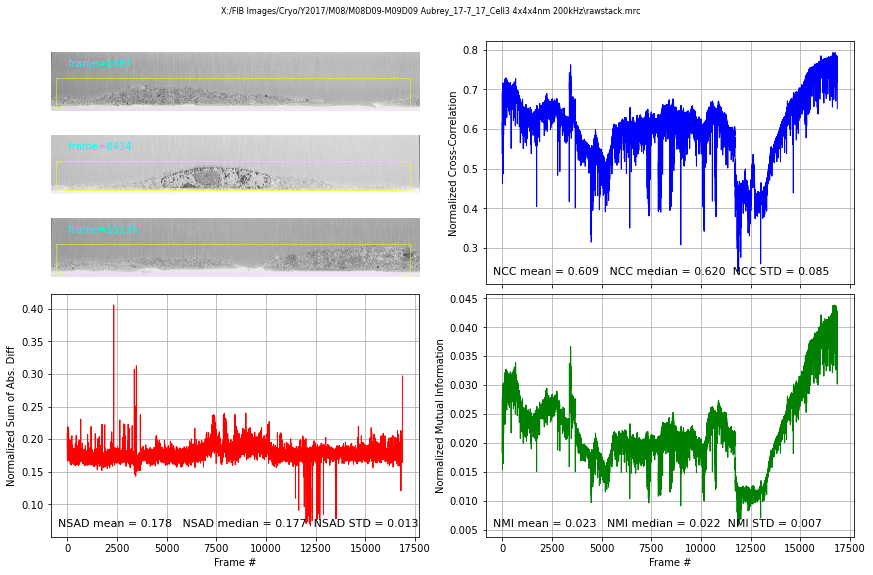

In [3]:
%%time
data_dir = 'X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz'
rawstack_mrc = os.path.join(data_dir, 'rawstack.mrc')
evaluation_box=[875,1000,200, 12000]
save_filename = os.path.join(data_dir, 'RawStack_withEB.mrc')
reg_results_rawstack = analyze_mrc_stack_registration(rawstack_mrc,
                                                          client,
                                                          use_DASK=True,
                                                         evaluation_box=evaluation_box,
                                                         save_filename=save_filename)

Will analyze regstrations in 16867 frames
Will save the data into X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz\SIFTalignTrans-16bit-rot_0_0_6_withEB_RegistrationQuality.csv
Using DASK distributed
Wall time: 1h 4min 14s


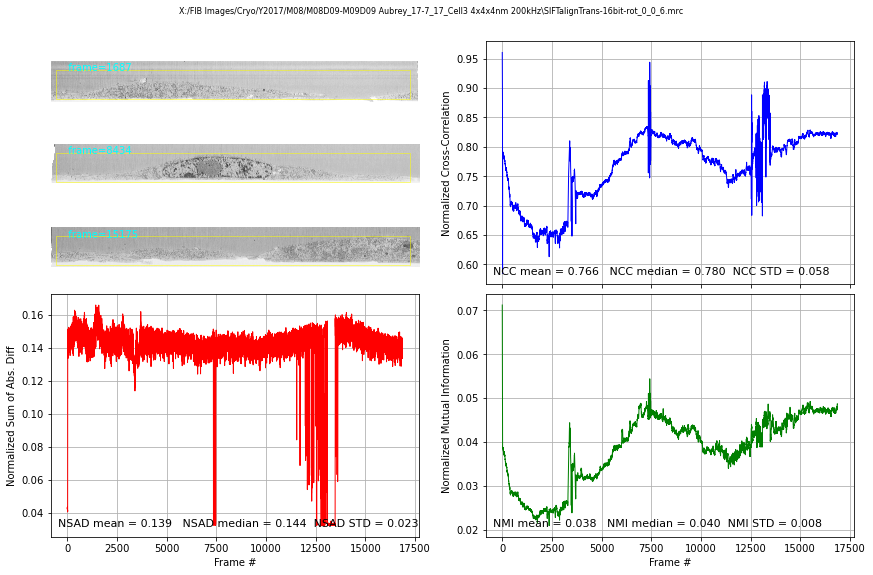

In [4]:
%%time
data_dir = 'X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz'
evaluation_box=[300,1000,200, 12000]
orig_rot_mrc = os.path.join(data_dir, 'SIFTalignTrans-16bit-rot_0_0_6.mrc')
save_filename = os.path.join(data_dir, 'SIFTalignTrans-16bit-rot_0_0_6_withEB.mrc')
reg_results_orig_mrc_rot = analyze_mrc_stack_registration(orig_rot_mrc,
                                                          client,
                                                          use_DASK=True,
                                                         evaluation_box=evaluation_box,
                                                         save_filename=save_filename)

Will analyze regstrations in 16867 frames
Will save the data into X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz\RegularizedAffineTransform_withEB_RegistrationQuality.csv
Using DASK distributed
Wall time: 1h 5min 7s


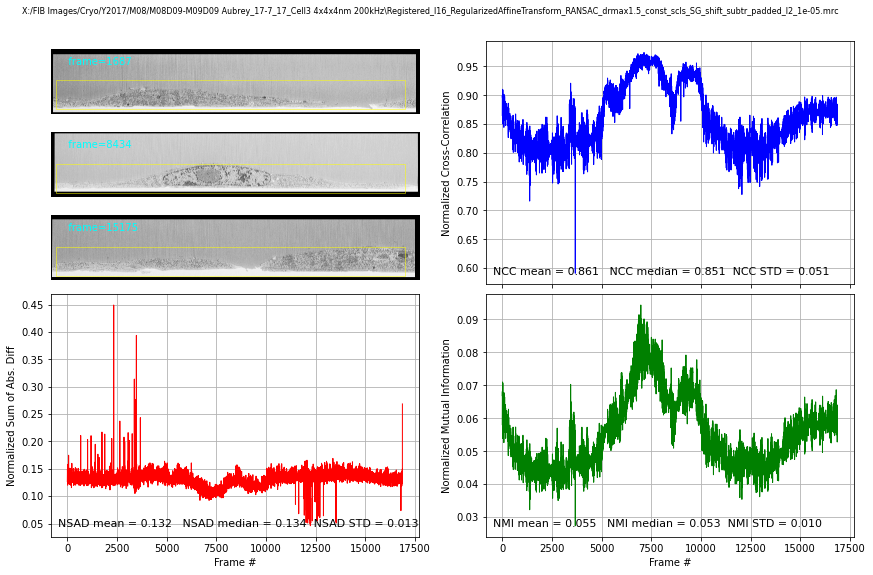

In [24]:
%%time
evaluation_box=[1100,1000,200, 12000]
RegularizedAffine_mrc = os.path.join(data_dir, 'Registered_I16_RegularizedAffineTransform_RANSAC_drmax1.5_const_scls_SG_shift_subtr_padded_l2_1e-05.mrc')
save_filename = os.path.join(data_dir, 'RegularizedAffineTransform_withEB.mrc')
reg_results_RegularizedAffine_EB0 = analyze_mrc_stack_registration(RegularizedAffine_mrc,
                                                          client,
                                                          use_DASK=True,
                                                         evaluation_box=evaluation_box,
                                                         save_filename=save_filename)

Will analyze regstrations in 16867 frames
Will save the data into X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz\RegularizedAffineTransform_withEB1_RegistrationQuality.csv
Using DASK distributed
Wall time: 1h 6min 18s


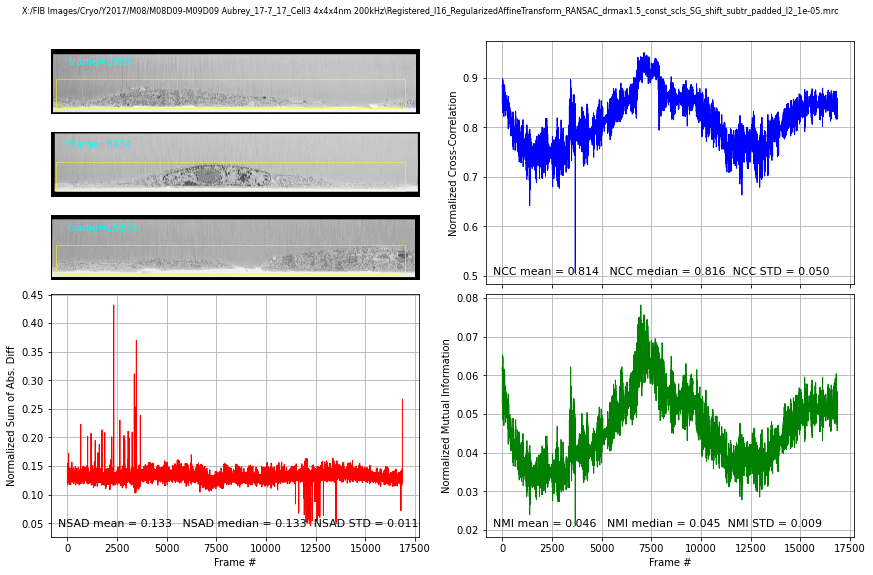

In [25]:
%%time
evaluation_box=[1050,1000,200, 12000]
RegularizedAffine_mrc = os.path.join(data_dir, 'Registered_I16_RegularizedAffineTransform_RANSAC_drmax1.5_const_scls_SG_shift_subtr_padded_l2_1e-05.mrc')
save_filename = os.path.join(data_dir, 'RegularizedAffineTransform_withEB1.mrc')
reg_results_RegularizedAffine_EB1 = analyze_mrc_stack_registration(RegularizedAffine_mrc,
                                                          client,
                                                          use_DASK=True,
                                                         evaluation_box=evaluation_box,
                                                         save_filename=save_filename)

Will analyze regstrations in 16867 frames
Will save the data into X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz\RegularizedAffineTransform_withEB2_RegistrationQuality.csv
Using DASK distributed
Wall time: 1h 6min 52s


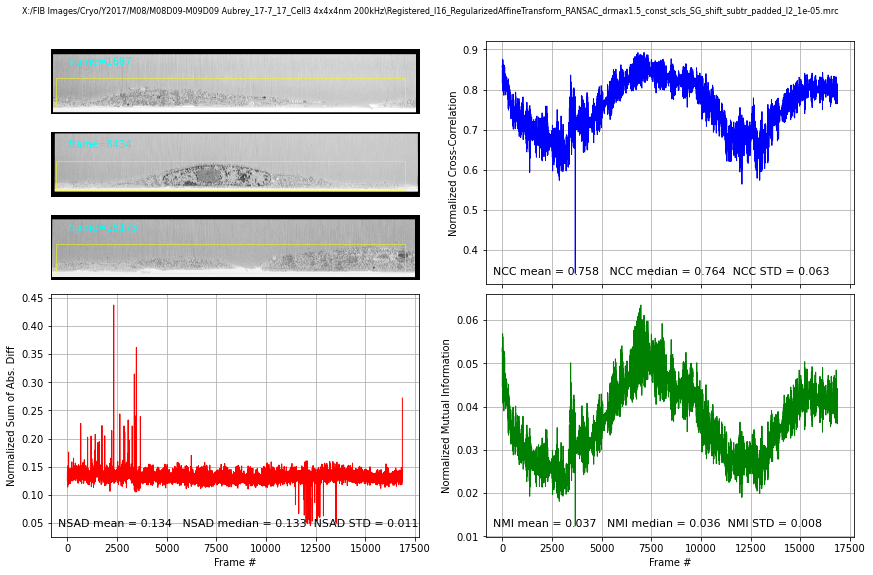

In [26]:
%%time
evaluation_box=[1000,1000,200, 12000]
RegularizedAffine_mrc = os.path.join(data_dir, 'Registered_I16_RegularizedAffineTransform_RANSAC_drmax1.5_const_scls_SG_shift_subtr_padded_l2_1e-05.mrc')
save_filename = os.path.join(data_dir, 'RegularizedAffineTransform_withEB2.mrc')
reg_results_RegularizedAffine_EB2 = analyze_mrc_stack_registration(RegularizedAffine_mrc,
                                                          client,
                                                          use_DASK=True,
                                                         evaluation_box=evaluation_box,
                                                         save_filename=save_filename)

Will analyze regstrations in 16867 frames
Will save the data into X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz\RegularizedAffineTransform_b045_withEB1_RegistrationQuality.csv
Using DASK distributed
Wall time: 34min 53s


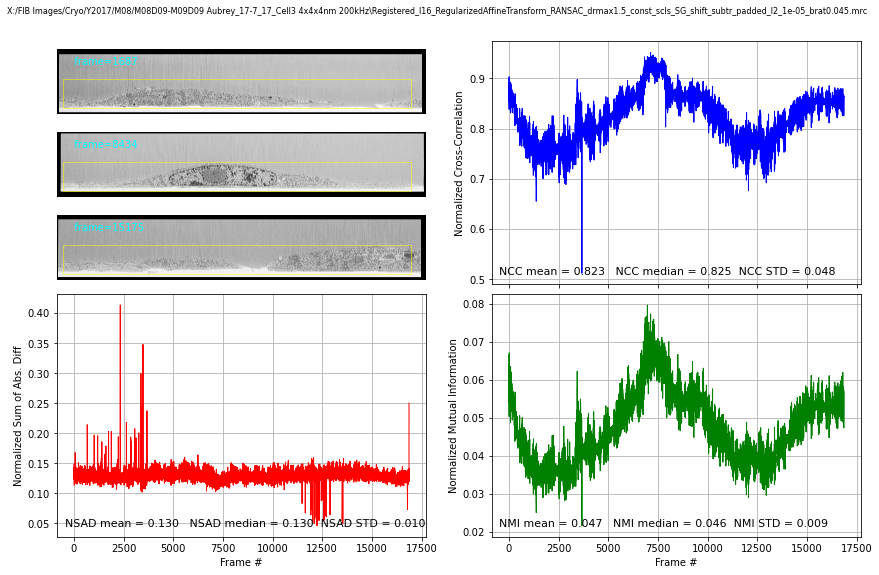

In [10]:
%%time
evaluation_box=[1050,1000,200, 12000]
RegularizedAffine_b045_mrc = os.path.join(data_dir, 'X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz\Registered_I16_RegularizedAffineTransform_RANSAC_drmax1.5_const_scls_SG_shift_subtr_padded_l2_1e-05_brat0.045.mrc')
save_filename = os.path.join(data_dir, 'RegularizedAffineTransform_b045_withEB1.mrc')
reg_results_RegularizedAffine_b045_EB1 = analyze_mrc_stack_registration(RegularizedAffine_b045_mrc,
                                                          client,
                                                          use_DASK=True,
                                                         evaluation_box=evaluation_box,
                                                         save_filename=save_filename)

Will analyze regstrations in 16867 frames
Will save the data into X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz\RegularizedAffineTransform_b045_withEB0_RegistrationQuality.csv
Using DASK distributed
Wall time: 35min 4s


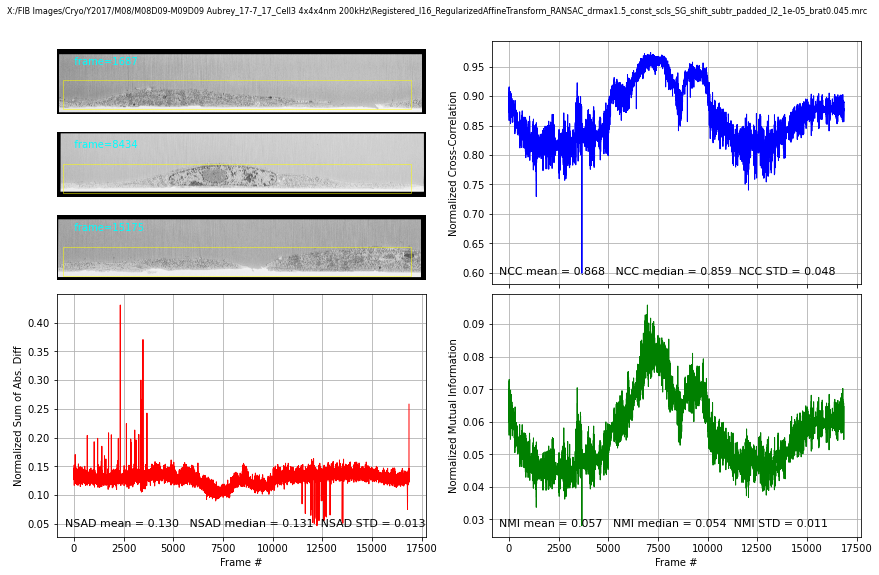

In [11]:
%%time
evaluation_box=[1100,1000,200, 12000]
RegularizedAffine_b045_mrc = os.path.join(data_dir, 'X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz\Registered_I16_RegularizedAffineTransform_RANSAC_drmax1.5_const_scls_SG_shift_subtr_padded_l2_1e-05_brat0.045.mrc')
save_filename = os.path.join(data_dir, 'RegularizedAffineTransform_b045_withEB0.mrc')
reg_results_RegularizedAffine_b045_EB0 = analyze_mrc_stack_registration(RegularizedAffine_b045_mrc,
                                                          client,
                                                          use_DASK=True,
                                                         evaluation_box=evaluation_box,
                                                         save_filename=save_filename)

In [8]:
0.780/(1.0-0.780)

3.545454545454546

In [12]:
sqrt(0.825/(1.0-0.825)), sqrt(0.816/(1.0-0.816)), sqrt(0.825/(1.0-0.825))/sqrt(0.816/(1.0-0.816))

2.171240593367237

Will analyze regstrations in 1000 frames
Will save the data into X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz\RawStack_withEB3_mid_fr_subset.mrc_RegistrationQuality.csv
Using DASK distributed
Wall time: 1min 39s


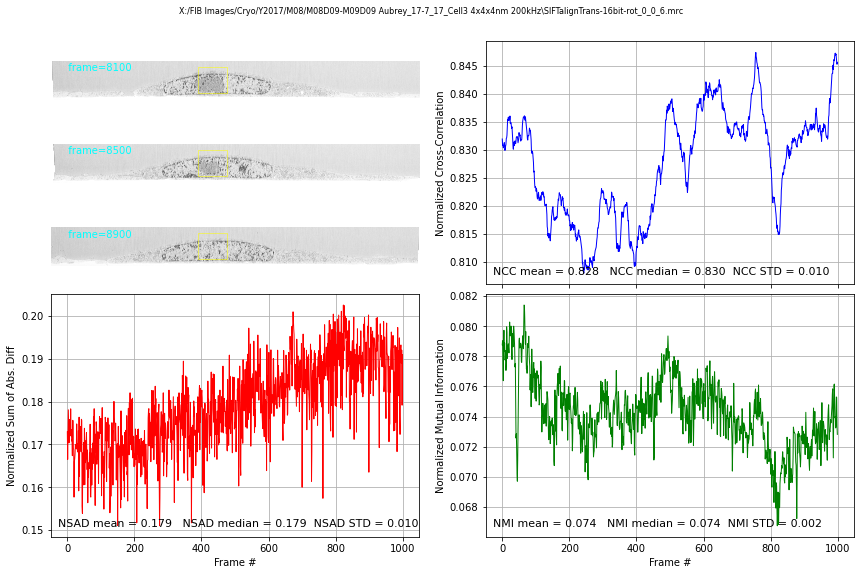

In [10]:
%%time
evaluation_box=[200,900,5000, 1000]
frames = np.arange(1000)+8000

rawstack_mrc = os.path.join(data_dir, 'rawstack.mrc')
save_filename = os.path.join(data_dir, 'RawStack_withEB3_mid_fr_subset.mrc')
reg_rawstack_subset = analyze_mrc_stack_registration(orig_rot_mrc,
                                                          client,
                                                          use_DASK=True,
                                                        frames = frames,
                                                         evaluation_box=evaluation_box,
                                                         save_filename=save_filename)

Will analyze regstrations in 1000 frames
Will save the data into X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz\SIFTalignTrans-16bit-rot_0_0_6_withEB3_mid_fr_subset_RegistrationQuality.csv
Using DASK distributed
Wall time: 1min 3s


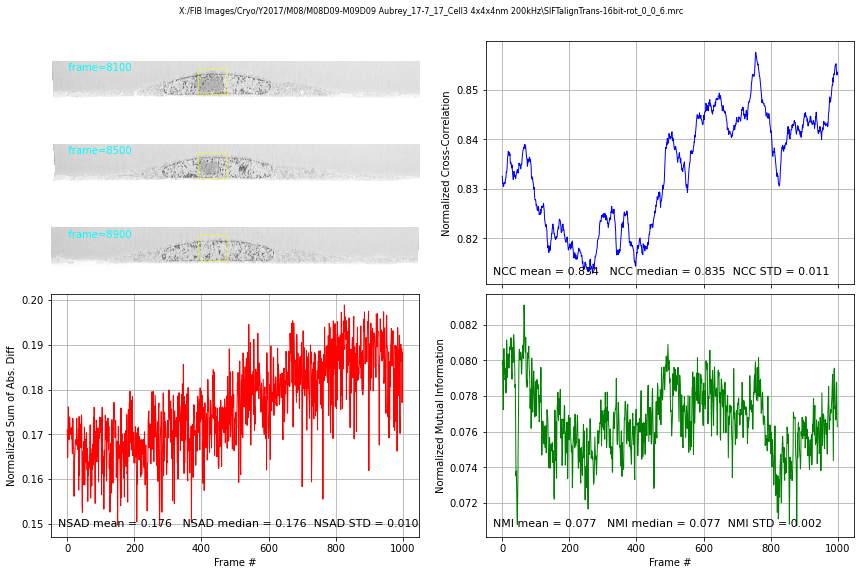

In [11]:
%%time
evaluation_box=[260, 900, 5000, 1000]
frames = np.arange(1000)+8000
orig_rot_mrc = os.path.join(data_dir, 'SIFTalignTrans-16bit-rot_0_0_6.mrc')
save_filename = os.path.join(data_dir, 'SIFTalignTrans-16bit-rot_0_0_6_withEB3_mid_fr_subset.mrc')
reg_results_orig_rot_subset = analyze_mrc_stack_registration(orig_rot_mrc,
                                                          client,
                                                          use_DASK=True,
                                                        frames = frames,
                                                         evaluation_box=evaluation_box,
                                                         save_filename=save_filename)

Will analyze regstrations in 1000 frames
Will save the data into X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz\RegularizedAffineTransform_withEB3_mid_fr_subset_RegistrationQuality.csv
Using DASK distributed
Wall time: 1min 35s


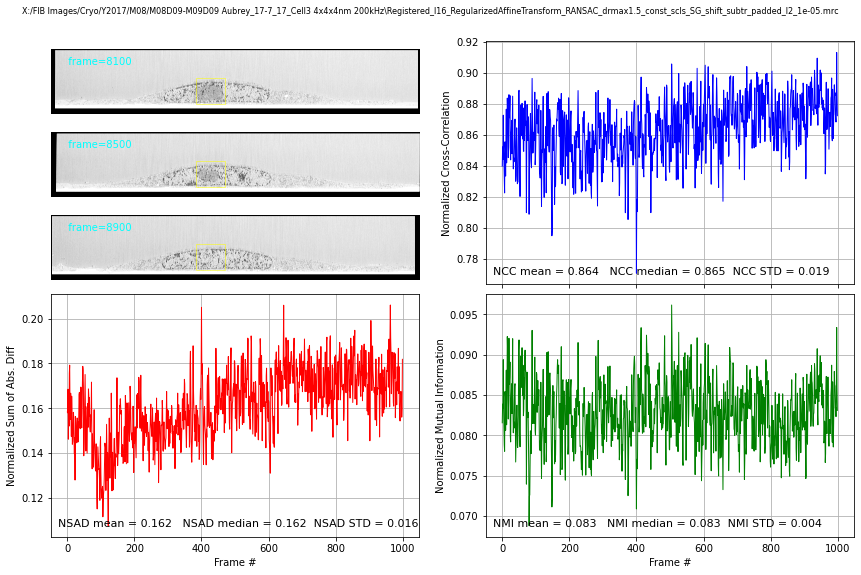

In [12]:
%%time
evaluation_box=[1000, 900, 5000, 1000]
frames = np.arange(1000)+8000
RegularizedAffine_mrc = os.path.join(data_dir, 'Registered_I16_RegularizedAffineTransform_RANSAC_drmax1.5_const_scls_SG_shift_subtr_padded_l2_1e-05.mrc')
save_filename = os.path.join(data_dir, 'RegularizedAffineTransform_withEB3_mid_fr_subset.mrc')
reg_results_RegularizedAffine_subset = analyze_mrc_stack_registration(RegularizedAffine_mrc,
                                                          client,
                                                          use_DASK=True,
                                                        frames = frames,
                                                         evaluation_box=evaluation_box,
                                                         save_filename=save_filename)

In [ ]:
%%time
evaluation_box=[1000, 900, 5000, 1000]
frames = np.arange(1000)+8000
RegularizedAffine_mrc_br045 = os.path.join(data_dir, 'Registered_I16_RegularizedAffineTransform_RANSAC_drmax1.5_const_scls_SG_shift_subtr_padded_l2_1e-05_brat0.045.mrc')
save_filename = os.path.join(data_dir, 'RegularizedAffineTransform_br045_withEB3_mid_fr_subset.mrc')
reg_results_RegularizedAffine_br045_subset = analyze_mrc_stack_registration(RegularizedAffine_mrc_br045,
                                                          client,
                                                          use_DASK=True,
                                                        frames = frames,
                                                         evaluation_box=evaluation_box,
                                                         save_filename=save_filename)

generating the registration quality summary plots:   0%|          | 0/4 [00:00<?, ?it/s]

generating the summary table: 0it [00:00, ?it/s]

saving the data into xlsx file:   0%|          | 0/4 [00:00<?, ?it/s]

'X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz\\Regstration_Summary_EB0_HeLa3.xlsx'

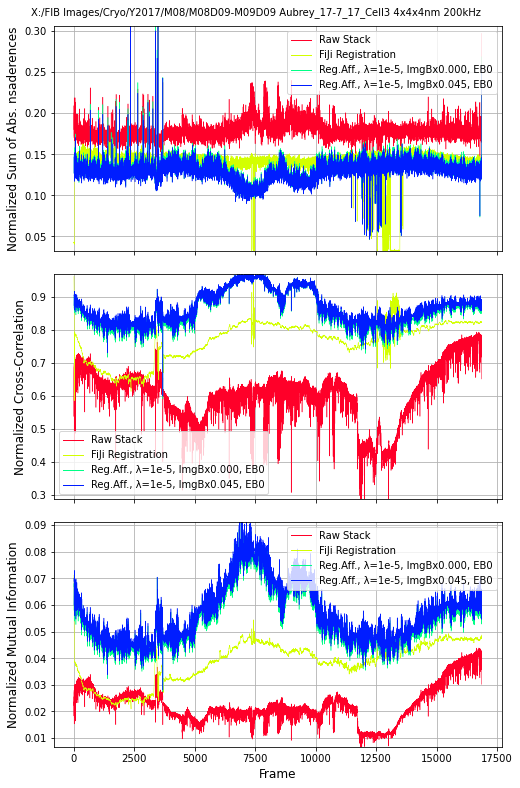

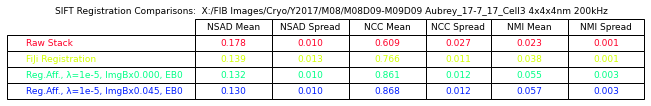

In [3]:
data_dir = 'X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz'
data_files = ['RawStack_withEB_RegistrationQuality.csv',
              'SIFTalignTrans-16bit-rot_0_0_6_withEB_RegistrationQuality.csv',
              'RegularizedAffineTransform_withEB_RegistrationQuality.csv',
             'RegularizedAffineTransform_b045_withEB0_RegistrationQuality.csv']
reg_qual_fls = [os.path.join(data_dir, df) for df in data_files]
pfs = ['Raw Stack',
      'FiJi Registration',
      'Reg.Aff., λ=1e-5, ImgBx0.000, EB0',
      'Reg.Aff., λ=1e-5, ImgBx0.045, EB0']

save_filename=os.path.join(data_dir, 'Regstration_Summary_EB0_HeLa3.png')
plot_registrtion_quality_csvs(reg_qual_fls, pfs, save_filename=save_filename)

generating the registration quality summary plots:   0%|          | 0/4 [00:00<?, ?it/s]

generating the summary table: 0it [00:00, ?it/s]

saving the data into xlsx file:   0%|          | 0/4 [00:00<?, ?it/s]

'X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz\\Regstration_Summary_EB1_HeLa3.xlsx'

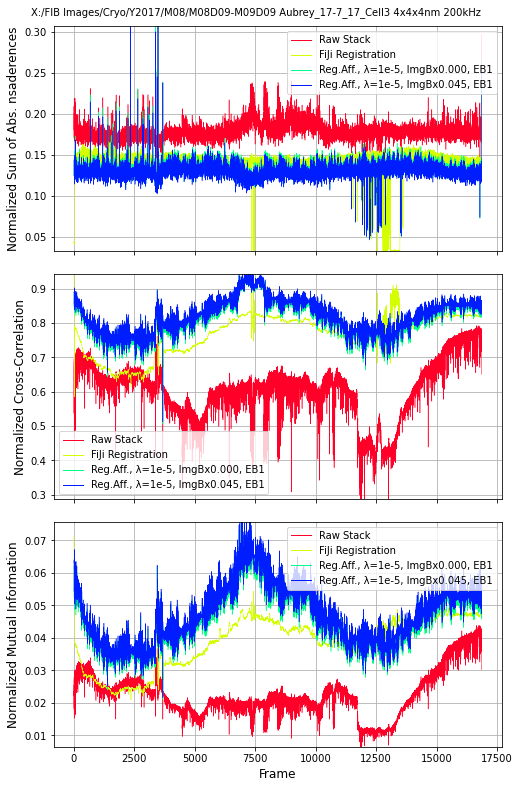

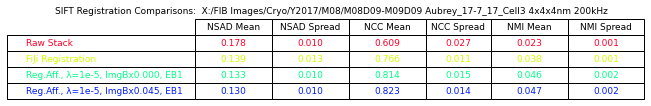

In [4]:
data_dir = 'X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz'
data_files = ['RawStack_withEB_RegistrationQuality.csv',
              'SIFTalignTrans-16bit-rot_0_0_6_withEB_RegistrationQuality.csv',
              'RegularizedAffineTransform_withEB1_RegistrationQuality.csv',
             'RegularizedAffineTransform_b045_withEB1_RegistrationQuality.csv']
reg_qual_fls = [os.path.join(data_dir, df) for df in data_files]
pfs = ['Raw Stack',
      'FiJi Registration',
      'Reg.Aff., λ=1e-5, ImgBx0.000, EB1',
      'Reg.Aff., λ=1e-5, ImgBx0.045, EB1']

save_filename=os.path.join(data_dir, 'Regstration_Summary_EB1_HeLa3.png')
plot_registrtion_quality_csvs(reg_qual_fls, pfs, save_filename=save_filename)

generating the registration quality summary plots:   0%|          | 0/5 [00:00<?, ?it/s]

generating the summary table: 0it [00:00, ?it/s]

saving the data into xlsx file:   0%|          | 0/5 [00:00<?, ?it/s]

'X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz\\Regstration_Summary_HeLa3_different_EBs.xlsx'

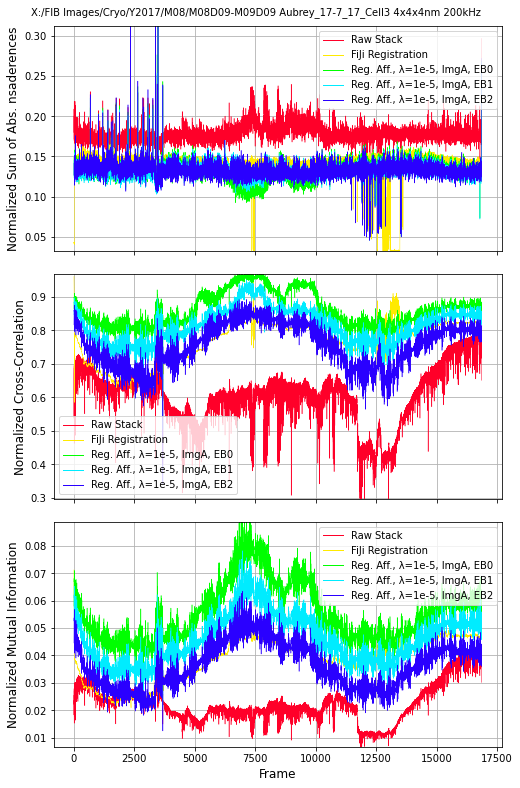

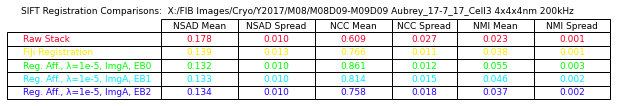

In [5]:
data_dir = 'X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz'
data_files = ['RawStack_withEB_RegistrationQuality.csv',
              'SIFTalignTrans-16bit-rot_0_0_6_withEB_RegistrationQuality.csv',
              'RegularizedAffineTransform_withEB_RegistrationQuality.csv',
             'RegularizedAffineTransform_withEB1_RegistrationQuality.csv',
              'RegularizedAffineTransform_withEB2_RegistrationQuality.csv']
reg_qual_fls = [os.path.join(data_dir, df) for df in data_files]
pfs = ['Raw Stack',
      'FiJi Registration',
      'Reg. Aff., λ=1e-5, ImgA, EB0',
      'Reg. Aff., λ=1e-5, ImgA, EB1',
      'Reg. Aff., λ=1e-5, ImgA, EB2']

save_filename=os.path.join(data_dir, 'Regstration_Summary_HeLa3_different_EBs.png')
plot_registrtion_quality_csvs(reg_qual_fls, pfs, save_filename=save_filename)

generating the registration quality summary plots:   0%|          | 0/3 [00:00<?, ?it/s]

generating the summary table: 0it [00:00, ?it/s]

saving the data into xlsx file:   0%|          | 0/3 [00:00<?, ?it/s]

'X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz\\Regstration_Summary_HeLa3_EB3_subset.xlsx'

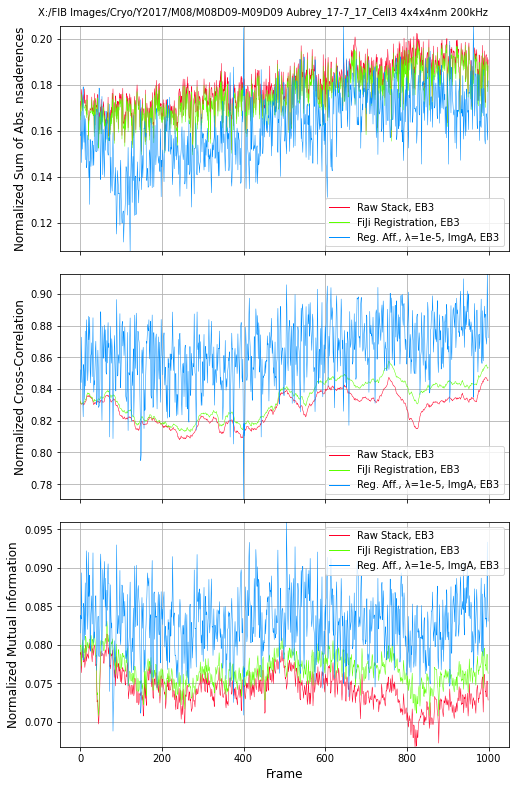

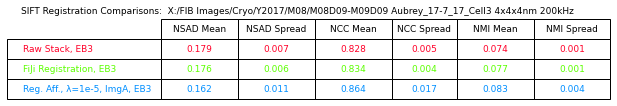

In [6]:
data_dir = 'X:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz'
data_files = ['RawStack_withEB3_mid_fr_subset_RegistrationQuality.csv',
              'SIFTalignTrans-16bit-rot_0_0_6_withEB3_mid_fr_subset_RegistrationQuality.csv',
              'RegularizedAffineTransform_withEB3_mid_fr_subset_RegistrationQuality.csv']
reg_qual_fls = [os.path.join(data_dir, df) for df in data_files]
pfs = ['Raw Stack, EB3',
      'FiJi Registration, EB3',
      'Reg. Aff., λ=1e-5, ImgA, EB3']

save_filename=os.path.join(data_dir, 'Regstration_Summary_HeLa3_EB3_subset.png')
plot_registrtion_quality_csvs(reg_qual_fls, pfs, save_filename=save_filename)

In [7]:
0.864/(1.0-0.864), np.sqrt(0.864/(1.0-0.864))

(6.352941176470588, 2.5205041512504174)

In [8]:
0.834/(1.0-0.834), np.sqrt(0.834/(1.0-0.834))

(5.024096385542167, 2.241449616998376)

In [9]:
np.sqrt(0.864/(1.0-0.864)) / np.sqrt(0.834/(1.0-0.834))

1.1244973485621932